In [15]:
import numpy as np
import matplotlib.pyplot as plt
import gvar as gv
import lsqfit

In [21]:

import matplotlib as mpl
from  matplotlib import rc
import matplotlib.pyplot as plt


colorsrgb = [(0, 0, 0), (230, 159, 0), (86, 180, 233),
          (0, 158, 115), (240, 228, 66), (0, 114, 178),
          (213, 94, 0), (204, 121, 167)]

fmts = ['o', 'd', 's', '^', '<', '8', '6', 'd', 'x']
colors = [tuple([el / 255 for el in c]) for c in colorsrgb]

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "Times New Roman"
mpl.rcParams.keys()
# mpl.rcParams["text.fontset"] = "Times New Roman"
mpl.rcParams["mathtext.fontset"] = "stix"

In [22]:
data_points = {}
trims = {(1, 2): 20, (2, 2): 20, (2, 4): 15, (1, 4): 10}
for m in [1, 2]:
    for ns in [2, 4]:
        directory = f'ProcessedData/ProcessedData/m={m}ns={ns}/'
        str1 = 'finalreadoutdynamicdecoupling_nairobi.csv'
        str2 = 'finalreadoutrescaling_nairobi.csv'
        file1 = np.loadtxt(directory + str1)
        file2 = np.loadtxt(directory + str2)
        d1 = gv.gvar(file1[0], file1[1:])[:trims[(m, ns)]]
        d2 = gv.gvar(file2[0], file2[1:])[:trims[(m, ns)]]
        data_points[(m, ns)] = [d1, d2]
        print(len(d1))

20
10
20
15


# 1. Let's first look at the best fits for the rescaling circuits
we fit the circuits to the functional form

\begin{equation}
f(x) = A cos(Bx) * exp(-C x) + D
\end{equation}

In [89]:
def fcn(x, p):
    return p[0] * gv.cos(p[1] * x) * gv.exp(p[2] * x) + p[3]

def get_fit(key, p0=[0, 0, 0, 0]):
    ypts = data_points[key][1]
    xpts = np.linspace(1, len(ypts), len(ypts))
    data = (xpts, ypts)
    fit_result = lsqfit.nonlinear_fit(data=data, fcn=fcn, p0=p0)
    print(fit_result)
    return fit_result, data

def get_fit_corr(key, data, p0=[0, 0, 0, 0]):
    ypts = data
    xpts = np.linspace(1, len(ypts), len(ypts))
    data = (xpts, ypts)
    fit_result = lsqfit.nonlinear_fit(data=data, fcn=fcn, p0=p0)
    print(fit_result)
    return fit_result, data

all_fits = {}

Here we fit the $a_s m = 1$ and $N_s = 2$ data

In [90]:
key = (1, 2)
fit_result, data = get_fit(key)
all_fits[key] = fit_result

Least Square Fit (no prior):
  chi2/dof [dof] = 3.3 [16]    Q = 9.2e-06    

Parameters:
              0     0.839 (19)      [   0 +- inf ]  
              1    0.0936 (54)      [   0 +- inf ]  
              2   -0.1072 (19)      [   0 +- inf ]  
              3     0.080 (12)      [   0 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 32/0.0)
  fitter = scipy_least_squares    method = trf



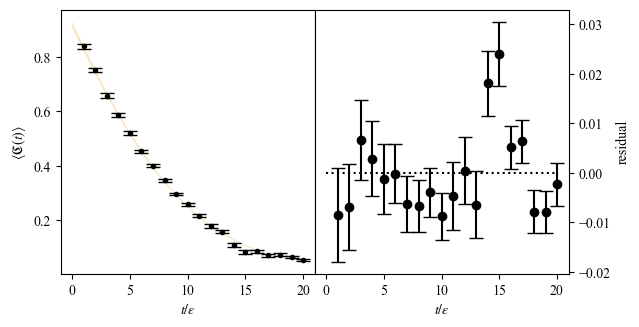

In [91]:
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True)
ax[0].errorbar(data[0], gv.mean(data[1]), yerr=gv.sdev(data[1]),
             capsize=5, color=colors[0], fmt='.')
xpoints = np.linspace(0, 20, 200)
ypoints = fcn(xpoints, fit_result.p)
ym, dy = gv.mean(ypoints), gv.sdev(ypoints)
ax[0].fill_between(xpoints, ym + dy, ym - dy, facecolor=list(colors[1]) + [0.25])
ax[1].errorbar(xpts, gv.mean(fcn(data[0], fit_result.p) - data[1]), yerr=gv.sdev(data[1]),
               capsize=5, color=colors[0], fmt='o')
ax[1].plot([0, 20], [0, 0], 'k:')
ax[1].yaxis.tick_right()
fig.set_size_inches((6.5, 3.375))
ax[0].set_xlabel(r'$t/\epsilon$')
ax[1].set_xlabel(r'$t/\epsilon$')
ax[0].set_ylabel(r'$\langle \mathfrak{C}(t)\rangle$')
ax[1].yaxis.set_label_position("right")
ax[1].set_ylabel(r'residual')
fig.tight_layout()
fig.subplots_adjust(wspace=0)
fig.savefig('residualcomprescalingm1ns2.pdf')

Here we fit the $m = 2$ and $N_s = 2$

In [92]:
key = (2, 2)
fit_result, data = get_fit(key)
all_fits[key] = fit_result

Least Square Fit (no prior):
  chi2/dof [dof] = 16 [16]    Q = 6.1e-46    

Parameters:
              0     0.638 (16)      [   0 +- inf ]  
              1    0.1359 (24)      [   0 +- inf ]  
              2   -0.0355 (16)      [   0 +- inf ]  
              3     0.215 (11)      [   0 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 31/0.0)
  fitter = scipy_least_squares    method = trf



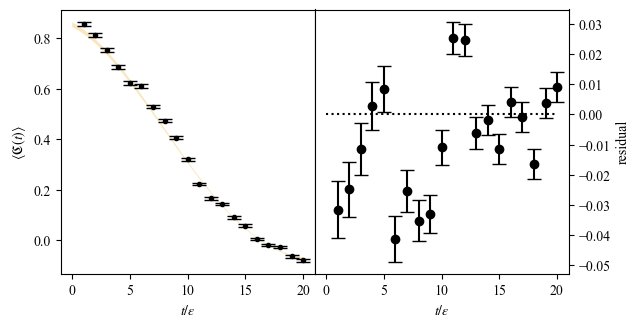

In [93]:
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True)
ax[0].errorbar(data[0], gv.mean(data[1]), yerr=gv.sdev(data[1]),
             capsize=5, color=colors[0], fmt='.')
xpoints = np.linspace(0, 20, 200)
ypoints = fcn(xpoints, fit_result.p)
ym, dy = gv.mean(ypoints), gv.sdev(ypoints)
ax[0].fill_between(xpoints, ym + dy, ym - dy, facecolor=list(colors[1]) + [0.25])
ax[1].errorbar(xpts, gv.mean(fcn(data[0], fit_result.p) - data[1]), yerr=gv.sdev(data[1]),
               capsize=5, color=colors[0], fmt='o')
ax[1].plot([0, 20], [0, 0], 'k:')
ax[1].yaxis.tick_right()
fig.set_size_inches((6.5, 3.375))
ax[0].set_xlabel(r'$t/\epsilon$')
ax[1].set_xlabel(r'$t/\epsilon$')
ax[0].set_ylabel(r'$\langle \mathfrak{C}(t)\rangle$')
ax[1].yaxis.set_label_position("right")
ax[1].set_ylabel(r'residual')
fig.tight_layout()
fig.subplots_adjust(wspace=0)
fig.savefig('residualcomprescalingm2ns2.pdf')

Here we fit the $a_s m = 1$ and $N_s = 4$ data

In [94]:
key = (1, 4)
fit_result, data = get_fit(key, p0=[1, 0, 0, 0])
all_fits[key] = fit_result

Least Square Fit (no prior):
  chi2/dof [dof] = 23 [6]    Q = 4.4e-27    

Parameters:
              0     0.635 (18)      [   1 +- inf ]  
              1    0.3010 (66)      [   0 +- inf ]  
              2   -0.1701 (76)      [   0 +- inf ]  
              3    0.1020 (88)      [   0 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 28/0.0)
  fitter = scipy_least_squares    method = trf



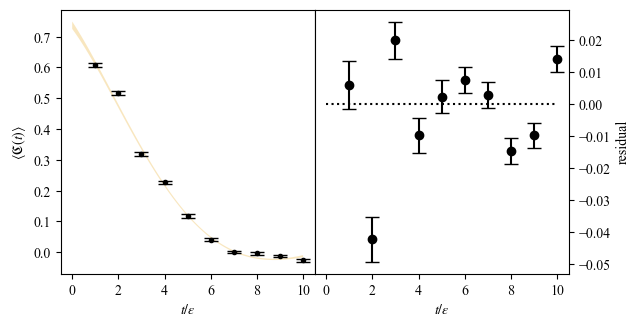

In [95]:
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True)
ax[0].errorbar(data[0], gv.mean(data[1]), yerr=gv.sdev(data[1]),
             capsize=5, color=colors[0], fmt='.')
xpoints = np.linspace(0, 10, 200)
ypoints = fcn(xpoints, fit_result.p)
ym, dy = gv.mean(ypoints), gv.sdev(ypoints)
ax[0].fill_between(xpoints, ym + dy, ym - dy, facecolor=list(colors[1]) + [0.25])
ax[1].errorbar(data[0], gv.mean(fcn(data[0], fit_result.p) - data[1]), yerr=gv.sdev(data[1]),
               capsize=5, color=colors[0], fmt='o')
ax[1].plot([0, 10], [0, 0], 'k:')
ax[1].yaxis.tick_right()
fig.set_size_inches((6.5, 3.375))
ax[0].set_xlabel(r'$t/\epsilon$')
ax[1].set_xlabel(r'$t/\epsilon$')
ax[0].set_ylabel(r'$\langle \mathfrak{C}(t)\rangle$')
ax[1].yaxis.set_label_position("right")
ax[1].set_ylabel(r'residual')
fig.tight_layout()
fig.subplots_adjust(wspace=0)
fig.savefig('residualcomprescalingm1ns4.pdf')

Here we fit the $m = 2$ and $N_s = 4$

In [96]:
key = (2, 4)
fit_result, data = get_fit(key)
all_fits[key] = fit_result

Least Square Fit (no prior):
  chi2/dof [dof] = 2.2 [11]    Q = 0.012    

Parameters:
              0     0.919 (16)      [   0 +- inf ]  
              1   -0.1749 (76)      [   0 +- inf ]  
              2   -0.2649 (68)      [   0 +- inf ]  
              3    0.0353 (47)      [   0 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 28/0.0)
  fitter = scipy_least_squares    method = trf



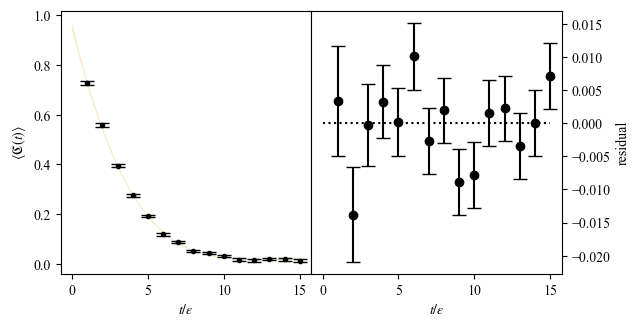

In [97]:
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True)
ax[0].errorbar(data[0], gv.mean(data[1]), yerr=gv.sdev(data[1]),
             capsize=5, color=colors[0], fmt='.')
xpoints = np.linspace(0, 15, 200)
ypoints = fcn(xpoints, fit_result.p)
ym, dy = gv.mean(ypoints), gv.sdev(ypoints)
ax[0].fill_between(xpoints, ym + dy, ym - dy, facecolor=list(colors[1]) + [0.25])
ax[1].errorbar(data[0], gv.mean(fcn(data[0], fit_result.p) - data[1]), yerr=gv.sdev(data[1]),
               capsize=5, color=colors[0], fmt='o')
ax[1].plot([0, 15], [0, 0], 'k:')
ax[1].yaxis.tick_right()
fig.set_size_inches((6.5, 3.375))
ax[0].set_xlabel(r'$t/\epsilon$')
ax[1].set_xlabel(r'$t/\epsilon$')
ax[0].set_ylabel(r'$\langle \mathfrak{C}(t)\rangle$')
ax[1].yaxis.set_label_position("right")
ax[1].set_ylabel(r'residual')
fig.tight_layout()
fig.subplots_adjust(wspace=0)
fig.savefig('residualcomprescalingm2ns4.pdf')

# 2. Now lets look at what the comparison of the fit results looks like 

we first try a fit of the data to the ansatz:

\begin{equation}
\mathfrak{C}(t / \epsilon) = A cos( B t / \epsilon) * exp(-C t / \epsilon) + D
\end{equation}

We compare three methods of fitting:
1. Fit the unrescaled correlator to the functional form
2. Fit the rescaled correlator to the functional form
3. Rescale the unrescaled correlator by the correlator fit evaluated at $t / \epsilon$

Least Square Fit (no prior):
  chi2/dof [dof] = 24 [5]    Q = 1e-24    

Parameters:
              0     0.840 (10)      [    1 +- inf ]  
              1   1.61960 (66)      [ 1.84 +- inf ]  
              2   -0.0466 (14)      [    0 +- inf ]  
              3    0.0012 (16)      [    0 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 10/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit (no prior):
  chi2/dof [dof] = 25 [5]    Q = 9.1e-26    

Parameters:
              0     0.852 (15)      [    1 +- inf ]  
              1   1.62128 (77)      [ 1.84 +- inf ]  
              2    0.0398 (21)      [    0 +- inf ]  
              3    0.0056 (28)      [    0 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 11/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit (no prior):
  chi2/dof [dof] = 52 [5]    Q = 3.6e-54    

Parameters:
              0     0.817 (14)      [    

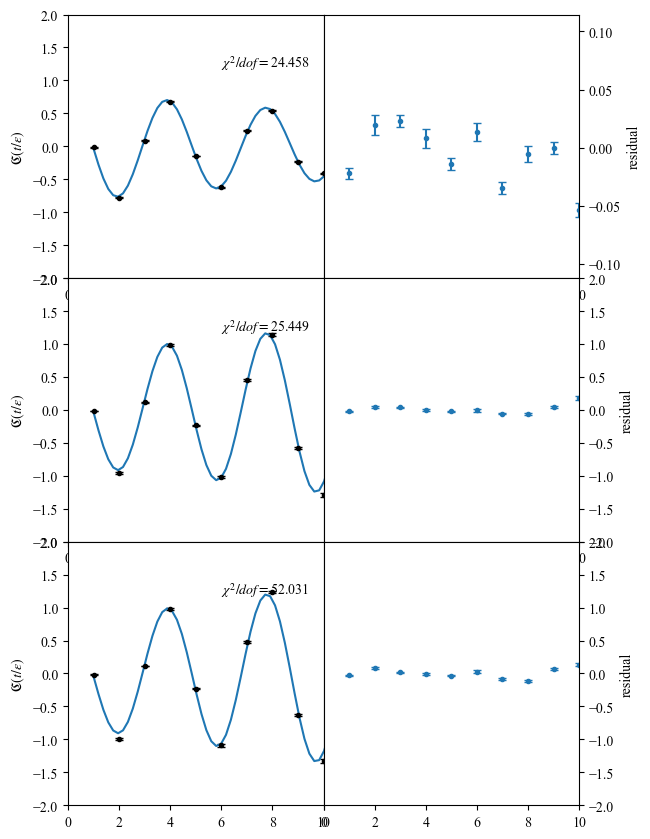

In [183]:
key = (2, 2)
data1 = data_points[key][0]
data2 = data_points[key][0] / data_points[key][1]
data3 = data_points[key][0] / fcn(np.linspace(1, trims[key], trims[key]),
                                  all_fits[key].p)

inflate_sig1 = {(2, 4): 1.2e2, (1, 4): 15 * 1.021, (1, 2): 98, (2, 2): 46}
inflate_sig2 = {(2, 4): 4.6, (1, 4): 13 * 0.96 * 1.004, (1, 2): 19, (2, 2):69}
inflate_sig3 = {(2, 4): 6, (1, 4): 45.344, (1, 2): 39, (2, 2): 92}


inflate_sig1 = {(2, 4): 1, (1, 4): 1, (1, 2): 1, (2, 2): 1}
inflate_sig2 = {(2, 4): 1, (1, 4): 1, (1, 2): 1, (2, 2):1}
inflate_sig3 = {(2, 4): 1, (1, 4): 1, (1, 2): 1, (2, 2): 1}

data1 = gv.gvar(gv.mean(data_points[key][0]), gv.evalcov(data_points[key][0]) * inflate_sig1[key])
data2 = gv.gvar(gv.mean(data_points[key][0] / data_points[key][1]),
                gv.evalcov(data_points[key][0] / data_points[key][1]) * inflate_sig2[key])
data3 = gv.gvar(gv.mean(data_points[key][0] / fcn(np.linspace(1, trims[key], trims[key]),
                                  all_fits[key].p)),
                gv.evalcov(data_points[key][0] / fcn(np.linspace(1, trims[key], trims[key]),
                                  all_fits[key].p)) * inflate_sig3[key])
# data3 = np.array([1, 1, 1, 1, 1, 1, -1, 1, 1, 1]) * data3
fit1, _ = get_fit_corr(key, data1[:9], p0=[1, 1.84, 0, 0])
fit2, _ = get_fit_corr(key, data2[:9], p0=[1, 1.84, 0, 0])
fit3, _ = get_fit_corr(key, data3[:9], p0=[1, 1.84, 0, 0])


fig, ax = plt.subplots(ncols=2, nrows=3)
xpoints = np.linspace(1, len(data1), 100)
xpts = np.linspace(1, len(data1), len(data1))

ax[0, 0].errorbar(np.linspace(1, len(data1), len(data1)),
             gv.mean(data1), yerr=gv.sdev(data1), capsize=3, color=colors[0], fmt='.')

ax[0, 0].plot(xpoints, fcn(xpoints, gv.mean(fit1.p)))
ax[0, 1].errorbar(xpts, gv.mean(fcn(xpts, fit1.p) - data1), yerr=gv.sdev(data1),
                  capsize=3, fmt='.')


ax[1, 0].errorbar(np.linspace(1, len(data1), len(data1)),
             gv.mean(data2), yerr=gv.sdev(data2), capsize=3, color=colors[0], fmt='.')

ax[1, 0].plot(xpoints, fcn(xpoints, gv.mean(fit2.p)))
ax[1, 1].errorbar(xpts, gv.mean(fcn(xpts, fit2.p) - data2), yerr=gv.sdev(data2),
                  capsize=3, fmt='.')


ax[2, 0].errorbar(np.linspace(1, len(data1), len(data1)),
             gv.mean(data3), yerr=gv.sdev(data3), capsize=3, color=colors[0], fmt='.')

ax[2, 0].plot(xpoints, fcn(xpoints, gv.mean(fit3.p)))
ax[2, 1].errorbar(xpts, gv.mean(fcn(xpts, fit3.p) - data3), yerr=gv.sdev(data3),
                  capsize=3, fmt='.')

for i in range(3):
    ax[i, 1].yaxis.tick_right()
    ax[i, 1].yaxis.set_label_position("right")
    ax[i, 1].set_ylabel('residual')
    ax[i, 0].set_ylabel(r'$\mathfrak{C}(t / \epsilon)$')
    ax[i, 0].set_ylim(-2, 2)
    ax[i, 0].set_xlim(0, 10)
    ax[i, 1].set_xlim(0, 10)
ax[0, 0].annotate(r'$\chi^2 / dof = $' + str(np.round(fit1.chi2 / fit1.dof, decimals=3)),
                 (0.6, 0.8), xycoords='axes fraction')
ax[1, 0].annotate(r'$\chi^2 / dof = $' + str(np.round(fit2.chi2 / fit2.dof, decimals=3)),
                 (0.6, 0.8), xycoords='axes fraction')
ax[2, 0].annotate(r'$\chi^2 / dof = $' + str(np.round(fit3.chi2 / fit3.dof, decimals=3)),
                 (0.6, 0.8), xycoords='axes fraction')
ax[1, 1].set_ylim(-2, 2)
ax[2, 1].set_ylim(-2, 2)
# ax[0, 0].plot(xpoints, fcn(xpoints, gv.mean(fit2.p)))
# ax[0, 0].plot(xpoints, fcn(xpoints, gv.mean(fit3.p)))

fig.set_size_inches((6.5, 8.5))
fig.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0)
fig.savefig(f'test_fit_proceedurem{key[0]}ns{key[1]}.pdf')

# Now let's 